In [1]:
from sklearn.svm import SVC 

In [26]:
# Packages for analysis
import numpy as np
import pandas as pd

# Packages for visuals
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale=1.2)
import warnings
# Allows charts to appear in the notebook
%matplotlib inline

In [22]:
receipes = pd.read_csv('recipes_muffins_cupcakes.csv')
receipes.tail()

,Type,Flour,Milk,Sugar,Butter,Egg,Baking Powder,Vanilla,Salt
15,Cupcake,42,18,25,9,5,1,0,0
16,Cupcake,36,14,21,14,11,2,1,0
17,Cupcake,38,15,31,8,6,1,1,0
18,Cupcake,36,16,24,12,9,1,1,0
19,Cupcake,34,17,23,11,13,0,1,0


In [23]:
receipes.Type.value_counts()

Muffin     10
Cupcake    10
Name: Type, dtype: int64

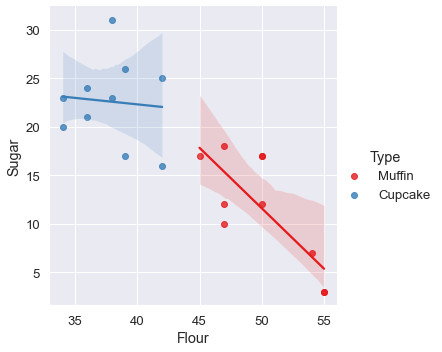

In [29]:
sns.lmplot(x='Flour', y='Sugar', data=receipes, hue='Type',
           palette='Set1');

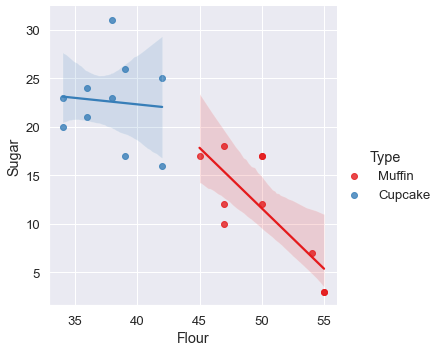

In [31]:
sns.lmplot(x='Flour',y='Sugar',data=receipes,hue='Type',palette='Set1');

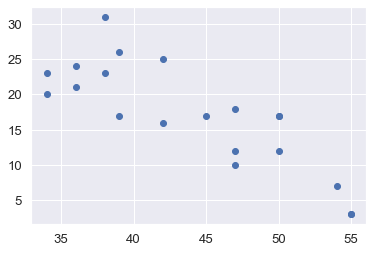

In [32]:
plt.scatter(receipes.Flour,receipes.Sugar);

In [38]:
ingredients = receipes[['Flour', 'Milk', 'Sugar', 'Butter', 'Egg', 'Baking Powder', 'Vanilla', 'Salt']].astype(dtype='int32')
ingredients
ingredients = receipes[['Flour','Sugar']]
ingredients[:5]

,Flour,Sugar
0,55,3
1,47,12
2,47,18
3,45,17
4,50,12


In [39]:
from sklearn.preprocessing import LabelEncoder

In [40]:
lb=LabelEncoder()

In [43]:
tl = lb.fit_transform(receipes.Type)
tl

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [44]:
receipes.Type =tl

In [46]:
receipes.head()

,Type,Flour,Milk,Sugar,Butter,Egg,Baking Powder,Vanilla,Salt
0,1,55,28,3,7,5,2,0,0
1,1,47,24,12,6,9,1,0,0
2,1,47,23,18,6,4,1,0,0
3,1,45,11,17,17,8,1,0,0
4,1,50,25,12,6,5,2,1,0


In [54]:
from sklearn.svm import SVC,SVR

In [56]:
svc = SVC()
svc

SVC()

In [68]:
svc.fit(ingredients,tl)

SVC()

In [69]:
svc.score(ingredients,tl)*100

95.0

In [63]:
svc1=SVC(kernel='linear')

In [64]:
svc1.fit(ingredients,tl)

SVC(kernel='linear')

In [70]:
svc1.score(ingredients,tl)*100

100.0

# testing

In [74]:
svc1.predict([[200,45]])

C:\Users\Rakesh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([1])

In [76]:
svc1.support_vectors_.astype(dtype='int32')

array([[42, 16],
       [42, 25],
       [45, 17]])

In [78]:
# Get the separating hyperplane
w = svc1.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(30, 60)
yy = a * xx - (svc1.intercept_[0]) / w[1] #main hyperplane

# Plot the parallels to the separating hyperplane that pass through the support vectors
b = svc1.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])
b = svc1.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])

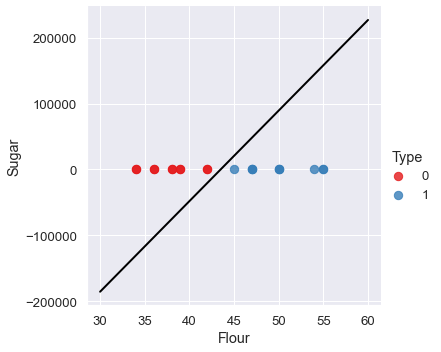

In [80]:
# Plot the hyperplane
sns.lmplot(x='Flour',y='Sugar', data=receipes, hue='Type', palette='Set1', fit_reg=False, scatter_kws={"s": 70})
plt.plot(xx, yy, linewidth=2, color='black');

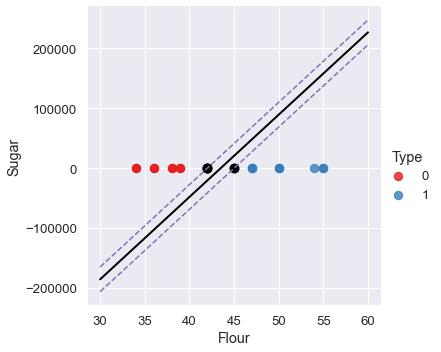

In [81]:
# Look at the margins and support vectors
#data samples
sns.lmplot(x='Flour', y='Sugar', data=receipes, hue='Type', palette='Set1', fit_reg=False, scatter_kws={"s": 70})

plt.plot(xx, yy, linewidth=2, color='black')#hyperplane
plt.plot(xx, yy_down, 'm--') #marginLine1
plt.plot(xx, yy_up, 'm--') #margineLine2
plt.scatter(svc1.support_vectors_[:, 0], svc1.support_vectors_[:, 1],
            s=80, facecolors='black');

In [84]:
# Create a function to guess when a recipe is a muffin or a cupcake
def muffin_or_cupcake(flour, sugar):
    if(svc1.predict([[flour, sugar]]))==1:
        print('You\'re looking at a muffin recipe!')
    else:
        print('You\'re looking at a cupcake recipe!')

In [87]:
muffin_or_cupcake(20,566)

You're looking at a cupcake recipe!


C:\Users\Rakesh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [88]:
muffin_or_cupcake(50,20)

You're looking at a muffin recipe!


C:\Users\Rakesh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


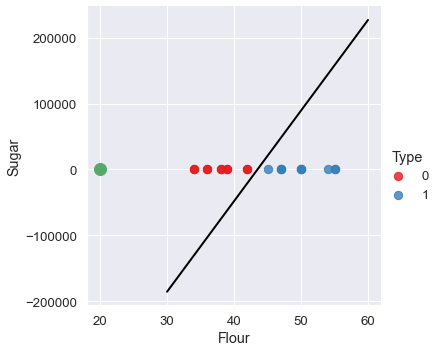

In [91]:
sns.lmplot(x='Flour', y='Sugar', data=receipes, hue='Type', palette='Set1', fit_reg=False, scatter_kws={"s": 70})
plt.plot(xx, yy, linewidth=2, color='black')
plt.plot(20, 200, 'go', markersize='12'); #test input